# McStasRead demo

In [1]:
from read_example import make_instrument, plot

In [2]:
instr = make_instrument()
instr.show_parameters()

 wavelength        = 2.0  // 
 delta_wavelength  = 0.1  // 


In [3]:
instr.set_parameters(wavelength=1.8, delta_wavelength=1.3)
instr.settings(ncount=1E6)

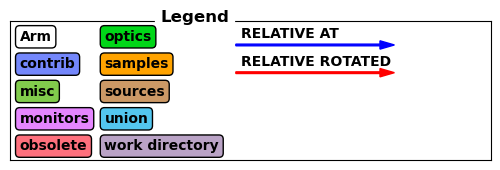

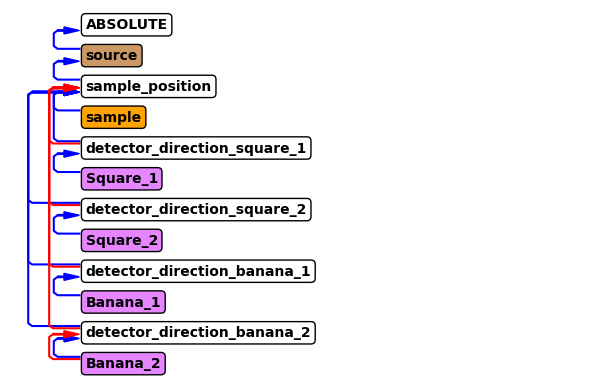

In [4]:
instr.show_diagram()

### Run simulation

In [5]:
data = instr.backengine()


INFO: Using directory: "/Users/madsbertelsen/Projects/McStasToX/github/McStasToX/test_16"
INFO: Regenerating c-file: test.c
CFLAGS=
      
 The parameter format of sample is initialized 
 using a static {,,,} vector.
  -> Such static vectors support literal numbers ONLY.
  -> Any vector use of variables or defines must happen via a 
     DECLARE/INITIALIZE pointer.


-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:

-----------------------------------------------------------
INFO: Recompiling: ./test.out
INFO: ===
Opening input file '/opt/miniconda3/envs/odin_env_1/share/mcstas/resources/data/Cu.laz' (Table_Read_Offset)
Table from file 'Cu.laz' (block 1) is 19 x 18 (x=1:6), constant step. interpolation: linear
  '# TITLE *-Cu-[FM3-M] Otte, H.M.[1961];# CELL 3.615050 3.615050 3.615050 90. ...'
PowderN: sample: Reading 

In [6]:
data

[
 McStasDataEvent: Banana_1 with 138667 events. Variables: p th y n id t,
 
 McStasDataEvent: Square_1 with 4121 events. Variables: p x y n id t L,
 
 McStasDataEvent: Banana_2 with 86420 events. Variables: p th y n id t,
 
 McStasDataEvent: Square_2 with 7922 events. Variables: p x y n id t]

### Histogram data to display

In [7]:
hist_data = [mon.make_2d(mon.variables[1], "y") for mon in data]

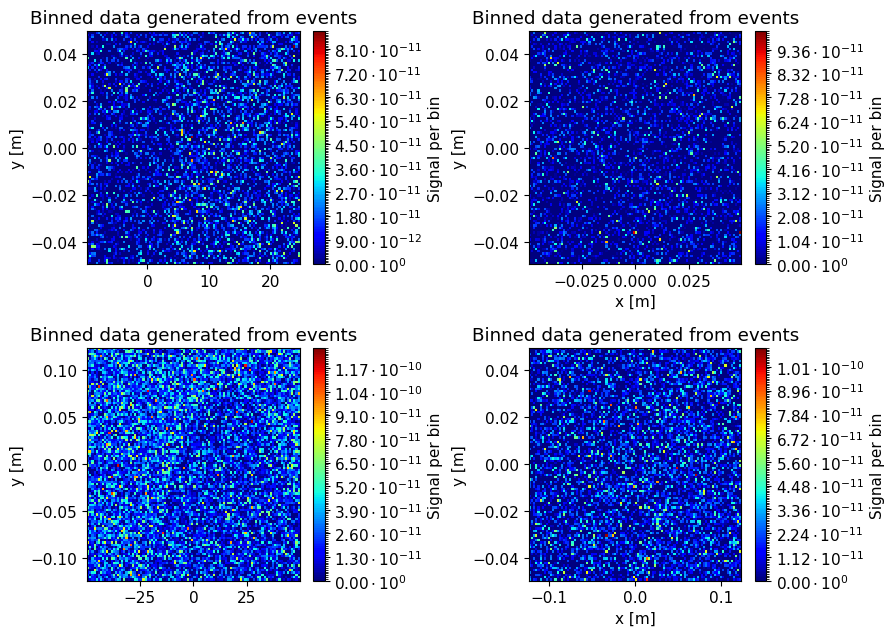

In [8]:
import mcstasscript as ms
ms.make_sub_plot(hist_data)

In [9]:
file_path = data[0].original_data_location
print(file_path)

/Users/madsbertelsen/Projects/McStasToX/github/McStasToX/test_16


In [10]:
%matplotlib widget

### Show list of components found in NeXus file

In [11]:
import mcstastox

with mcstastox.Read(file_path) as loaded_data:
    loaded_data.show_components()

All components in file:
  source
  sample_position
  sample
  detector_direction_square_1
  Square_1
  detector_direction_square_2
  Square_2
  detector_direction_banana_1
  Banana_1
  detector_direction_banana_2
  Banana_2


#### Show list of these with available data

In [12]:
with mcstastox.Read(file_path) as loaded_data:
    loaded_data.show_components_with_data()

All components with data in file:
  Square_1
  Square_2
  Banana_1
  Banana_2


In [13]:
with mcstastox.Read(file_path) as loaded_data:
    variables = loaded_data.get_component_variables("Square_1")
    print(variables)

p x y n id t L 


#### Show list of these with geometry information

In [14]:
with mcstastox.Read(file_path) as loaded_data:
    loaded_data.show_components_with_geometry()

All components with geometry information in file:
  Square_1
  Square_2
  Banana_1
  Banana_2


#### Show monitors with pixel ID's

In [15]:
with mcstastox.Read(file_path) as loaded_data:
    loaded_data.show_components_with_ids()

All components with pixel id information in file:
  Square_1
  Square_2
  Banana_1
  Banana_2


In [16]:
with mcstastox.Read(file_path) as loaded_data:
    print(loaded_data.get_components_with_ids())

['Square_1', 'Square_2', 'Banana_1', 'Banana_2']


### Get local pixel coordinates for a given component

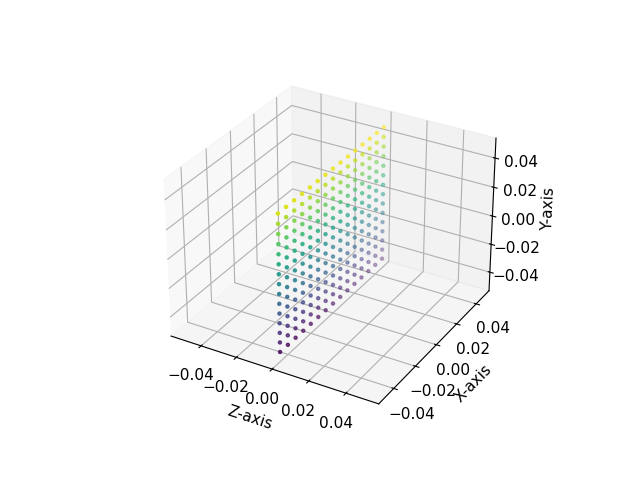

In [17]:
with mcstastox.Read(file_path) as loaded_data:
    coordinates = loaded_data.get_component_local("Square_1")

plot(coordinates)

### Get global coordinates for a given component

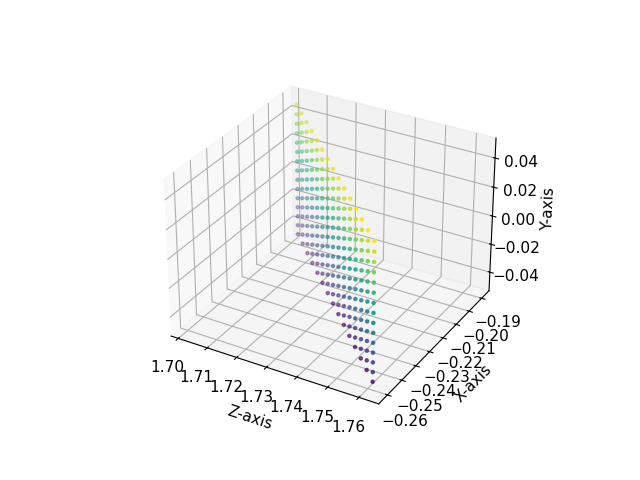

In [18]:
with mcstastox.Read(file_path) as loaded_data:
    coordinates = loaded_data.get_component_global("Square_1")

plot(coordinates)

### Get sample position as well

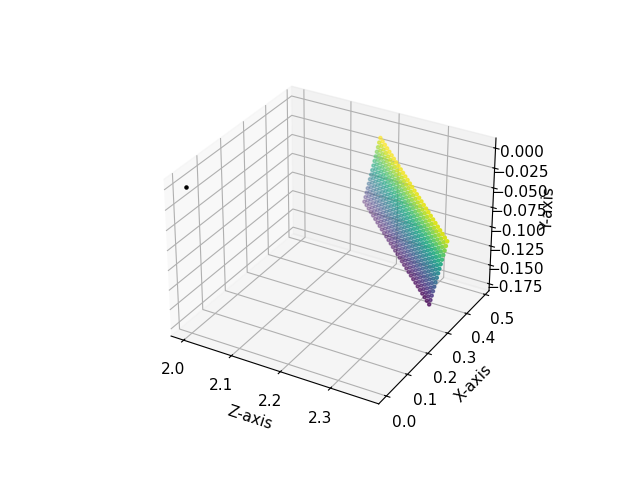

In [19]:
with mcstastox.Read(file_path) as loaded_data:
    coordinates = loaded_data.get_component_global("Square_2")
    sample_pos = loaded_data.get_global_component_coordinates("sample_position")

plot(coordinates, points=[sample_pos])

### Get pixel coordinates for list of monitors

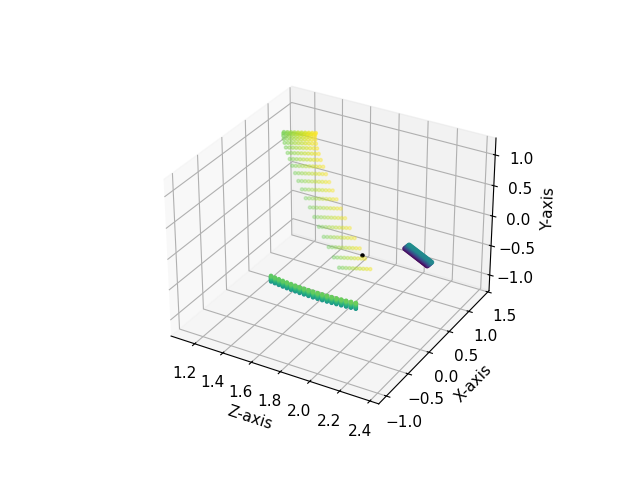

In [20]:
with mcstastox.Read(file_path) as loaded_data:
    coordinates = loaded_data.get_id_to_global_coordinates(component_name=["Square_2", "Banana_1", "Banana_2"])
    sample_pos = loaded_data.get_global_component_coordinates("sample_position")

plot(coordinates, points=[sample_pos])

### Include source and get all pixel coordinates

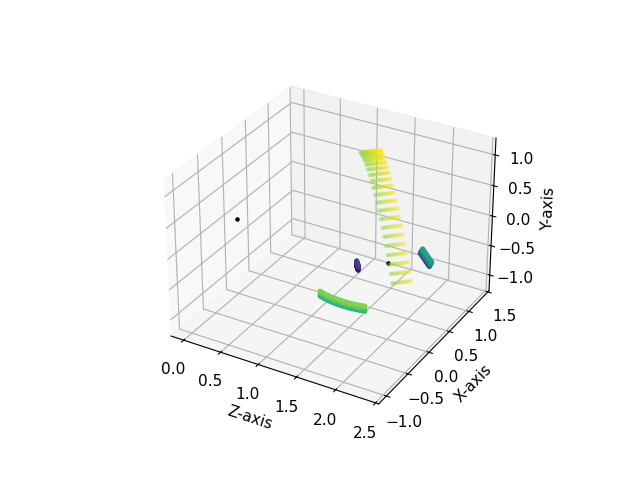

In [21]:
with mcstastox.Read(file_path) as loaded_data:
    coordinates = loaded_data.get_id_to_global_coordinates()
    sample_pos = loaded_data.get_global_component_coordinates("sample_position")
    source_pos = loaded_data.get_global_component_coordinates("source")

plot(coordinates, points=[sample_pos, source_pos])

### Export to (simple) Scipp object

In [22]:
with mcstastox.Read(file_path) as loaded_data:
    scipp_object = loaded_data.export_scipp_simple(source_name="source",
                                                   sample_name="sample_position", 
                                                   component_name="Banana_2")

In [23]:
scipp_object

<scipp.DataArray>
Dimensions: Sizes[events:18725, ]
Coordinates:
* position                  vector3              [m]  (events)  [(1.33426, -0.0535821, 1.31386), (1.20866, -0.778511, 1.56328), ..., (1.30885, -0.433353, 1.40585), (1.22784, 0.177621, 1.15235)]
* sample_position           vector3              [m]  ()  (0, 0, 2)
* source_position           vector3              [m]  ()  (0, 0, 0)
* t                         float64              [s]  (events)  [0.00193064, 0.00182577, ..., 0.00161337, 0.00141477]
Data:
                            float64         [counts]  (events)  [7.80145e-12, 1.25565e-11, ..., 2.48948e-11, 9.55223e-13]

### Plot event positions

In [24]:
import plopp as pp

pp.scatter3d(scipp_object[0::3], pos='position', size=0.02, cbar=True, norm="linear")

Figure(children=(HBar(children=(HTML(value=''),)), HBox(children=(VBar(children=(Toolbar(children=(ButtonTool(…

### Perform coordinate transforms

In [25]:
from scippneutron.conversion.graph.beamline import beamline
from scippneutron.conversion.graph.tof import elastic

# McStas provides absolute time, not time of flight
scipp_object.coords["tof"] = scipp_object.coords["t"]

graph = {**beamline(scatter=True), **elastic("tof")}

In [26]:
scipp_object = scipp_object.transform_coords("dspacing", graph=graph)

In [27]:
scipp_object.hist(dspacing=150).plot(norm="log")

InteractiveFigure(children=(HBar(), HBar(children=(VBar(children=(Toolbar(children=(ButtonTool(icon='home', la…

## Load all data in simple scipp format

In [28]:
import mcstastox
with mcstastox.Read(file_path) as loaded_data:
    all_data = loaded_data.export_scipp_simple(source_name="source",
                                                   sample_name="sample_position")

all_data

<scipp.DataArray>
Dimensions: Sizes[events:36422, ]
Coordinates:
* position                  vector3              [m]  (events)  [(-0.25051, 0.0133333, 1.75331), (-0.194334, 0.0133333, 1.70617), ..., (1.30885, -0.433353, 1.40585), (1.22784, 0.177621, 1.15235)]
* sample_position           vector3              [m]  ()  (0, 0, 2)
* source_position           vector3              [m]  ()  (0, 0, 0)
* t                         float64              [s]  (events)  [0.000341707, 0.000952344, ..., 0.00161337, 0.00141477]
Data:
                            float64         [counts]  (events)  [1.40337e-11, 2.26524e-11, ..., 2.48948e-11, 9.55223e-13]

In [29]:
pp.scatter3d(all_data[0::3], pos='position', size=0.02, cbar=True, norm="log")

Figure(children=(HBar(children=(HTML(value=''),)), HBox(children=(VBar(children=(Toolbar(children=(ButtonTool(…

### Convert to d-space and compare
Lets compare data from all the detectors with the previous scipp object that only contaned one.

In [30]:
all_data.coords["tof"] = all_data.coords["t"]
all_data = all_data.transform_coords("dspacing", graph=graph)

pp.plot({"Only banana 2": scipp_object.hist(dspacing=200),
         "All data": all_data.hist(dspacing=200)}, norm="log")

InteractiveFigure(children=(HBar(), HBar(children=(VBar(children=(Toolbar(children=(ButtonTool(icon='home', la…

### Also access to data directly
Its possible to get access to the data directly if necessary, this is demonstrated here.

In [31]:
with mcstastox.Read(file_path) as loaded_data:
    raw_event_data = loaded_data.get_event_data(variables=["id", "t"], component_name="Square_2")
    pos, rot = loaded_data.get_component_placement(component_name="Square_2")

print("Raw event data")
print(raw_event_data["id"])
print(raw_event_data["t"])

print("Component placement")
print(pos)
print(rot)

Raw event data
[369. 548. 460. ... 272. 382. 653.]
[0.00100376 0.0012437  0.00148061 ... 0.00121528 0.00071989 0.0009908 ]
Component placement
[ 0.41933528 -0.09313876  2.25589664]
[[ 0.54463904  0.28684223 -0.78809254]
 [-0.          0.93969262  0.34202014]
 [ 0.83867057 -0.18627752  0.51179328]]


In [32]:
with mcstastox.Read(file_path) as loaded_data:
    raw_event_data = loaded_data.get_event_data(variables=["id", "t", "L"], component_name="Square_1")

### Add additional data to a scipp object
We can add data read directly to the scipp object, here the actual wavelength recorded by McStas.

In [33]:
import scipp as sc

with mcstastox.Read(file_path) as loaded_data:
    sq1 = loaded_data.export_scipp_simple(source_name="source", sample_name="sample_position", component_name="Square_1")

sq1.coords["sim_wavelength"] = sc.array(dims=["events"], values=raw_event_data["L"], unit="Å")

sq1.coords["tof"] = sq1.coords["t"]
sq1 = sq1.transform_coords("wavelength", graph=graph)
sq1.coords["wavelength_ratio"] = (sq1.coords["sim_wavelength"] - sq1.coords["wavelength"])/sq1.coords["sim_wavelength"]

In [34]:
sq1

<scipp.DataArray>
Dimensions: Sizes[events:4121, ]
Coordinates:
  L1                        float64              [m]  ()  2
  L2                        float64              [m]  (events)  [0.351836, 0.352531, ..., 0.351014, 0.353852]
  Ltotal                    float64              [m]  (events)  [2.35184, 2.35253, ..., 2.35101, 2.35385]
  incident_beam             vector3              [m]  ()  (0, 0, 2)
  position                  vector3              [m]  (events)  [(-0.25051, 0.0133333, 1.75331), (-0.194334, 0.0133333, 1.70617), ..., (-0.204548, 0, 1.71474), (-0.255617, 0.0333333, 1.7576)]
  sample_position           vector3              [m]  ()  (0, 0, 2)
  scattered_beam            vector3              [m]  (events)  [(-0.25051, 0.0133333, -0.246689), (-0.194334, 0.0133333, -0.293827), ..., (-0.204548, 0, -0.285257), (-0.255617, 0.0333333, -0.242404)]
* sim_wavelength            float64             [Å]  (events)  [0.573766, 1.60474, ..., 1.71817, 1.52457]
  source_position           vector3              [m]  ()  (0, 0, 0)
* t                         float64              [s]  (events)  [0.000341707, 0.000952344, ..., 0.00101988, 0.000905114]
  tof                       float64              [s]  (events)  [0.000341707, 0.000952344, ..., 0.00101988, 0.000905114]
* wavelength                float64             [Å]  (events)  [0.574788, 1.60147, ..., 1.71615, 1.52119]
* wavelength_ratio          float64  [dimensionless]  (events)  [-0.00178049, 0.00203796, ..., 0.00117442, 0.00221371]
Data:
                            float64         [counts]  (events)  [1.40337e-11, 2.26524e-11, ..., 5.26782e-12, 1.87274e-11]

### Plotting comparison between actual and calculated wavelength

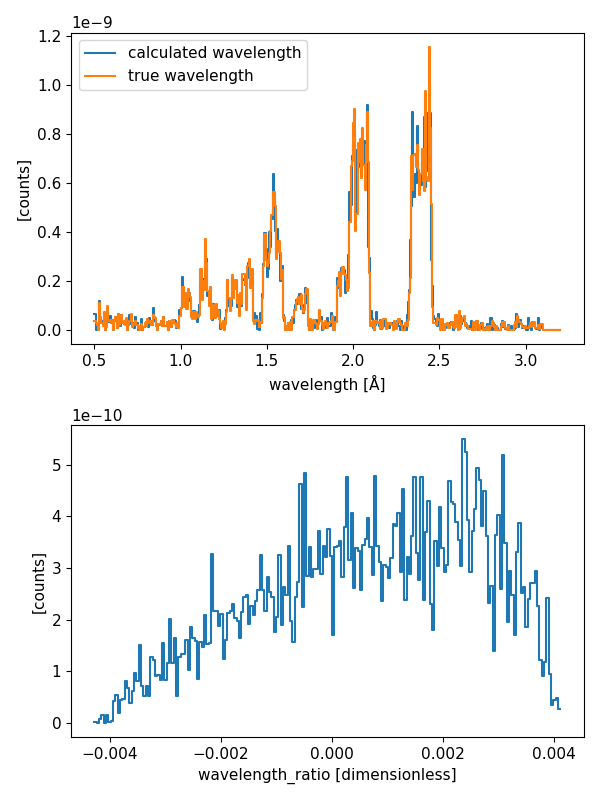

In [35]:
w_start = 0.5; w_end=3.2; w_steps=401
wavs = sc.linspace("wavelength", w_start, w_end, w_steps, unit="angstrom")
sim_wavs = sc.linspace("sim_wavelength", w_start, w_end, w_steps, unit="angstrom")

pp.plot({
    "calculated wavelength": sq1.hist(wavelength=wavs),
    "true wavelength": sq1.hist(sim_wavelength=sim_wavs).rename(sim_wavelength="wavelength")
}) / sq1.hist(wavelength_ratio=200).plot()